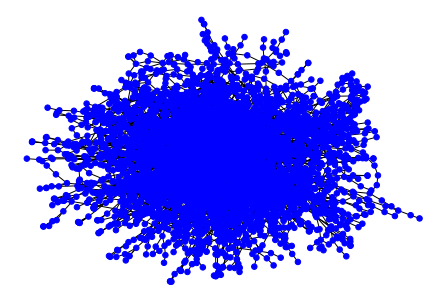

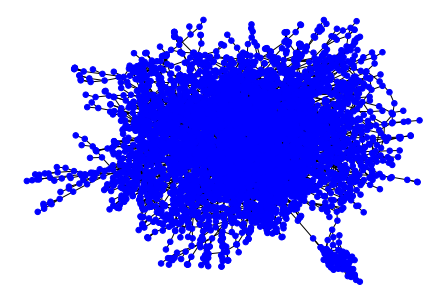

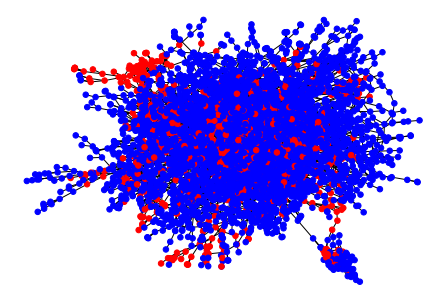

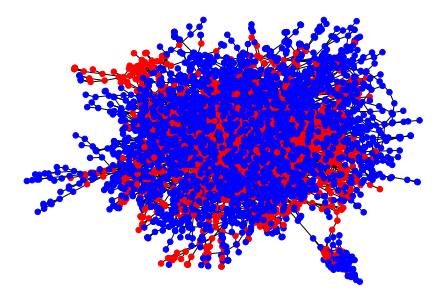

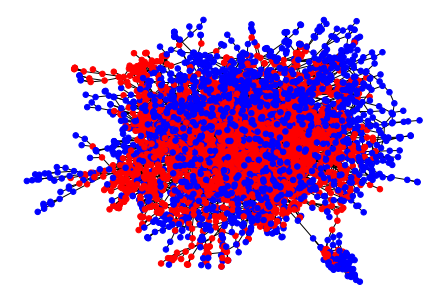

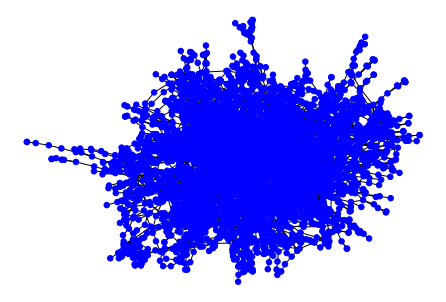

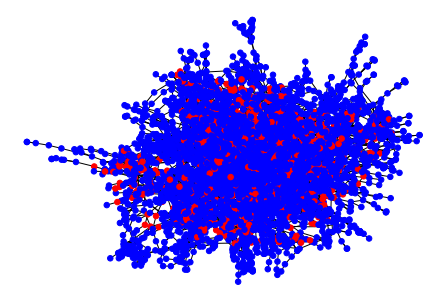

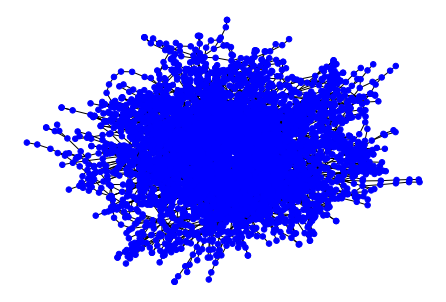

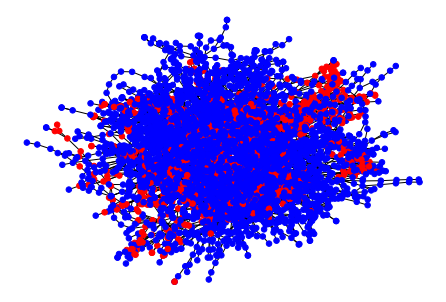

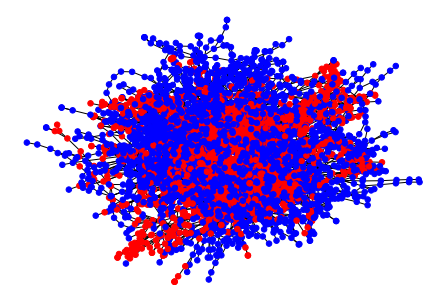

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random 

#payoff matrix 
a=0
b=1

infected_list = []
not_infected_list =[]

#initiate to infect the nodes 
def initiate_contagion(g,type_of_attack):
    
    #10% size of the length of all nodes 
    n = int(len(g) * 0.1)
    if type_of_attack == "random_attack":
         v = random.choice(list(g.nodes.keys()))
    elif type_of_attack == "degree_attack":
        idegree = nx.degree_centrality(g)
    elif type_of_attack == "closeness_attack":
        idegree = nx.closeness_centrality(g)
    elif type_of_attack == "clustering_attack":
        idegree = nx.clustering(g)
    elif type_of_attack == "pagerank_attack":
        idegree = nx.pagerank(g)  
    
    if type_of_attack != "random_attack":
        Nodes = sorted(idegree.items(), key=lambda x: x[1], reverse=True )[0:n]
        for key, val in Nodes:
            g.nodes[key]['contagion'] = True
    
def draw_graph(g,layout):
    colors = set_node_colors(nx.get_node_attributes(g, 'contagion'))
    nx.draw(g, node_color=list(colors.values()), pos=layout, node_size=30, font_size=6, font_color='w', arrowsize=5)
    plt.draw()
    plt.savefig('./social_contagion.pdf')
    plt.show()
    plt.close()

def set_node_colors(contagion_list):
    for k, v in contagion_list.items():
        if v:
            contagion_list[k] = 'red'
        else:
            contagion_list[k] = 'blue'
    return contagion_list

def contagioness_plot():
    
    
    plt.figure() 
    plt.plot(infected_list[0], not_infected_list[0], label="random")
    plt.plot(infected_list[1], not_infected_list[1],marker='o', label="degree")
    plt.plot(infected_list[2], not_infected_list[2], label="closeness")
    plt.plot(infected_list[3], not_infected_list[3],marker='o', label="clustering")
    plt.plot(infected_list[4], not_infected_list[4], label="pagerank")
#     plt.plot(infected_list[5], not_infected_list[5],marker='o', label="degree")
    plt.ylabel('Not Infected Nodes')
    plt.xlabel('Infected Nodes')
    plt.title('Social Contagion difussion plot')
    plt.legend()
    plt.savefig('./contagion.pdf')
    plt.show()
    plt.close() 
    
    

def main(g,type_of_attack):

    infected_node = []
    not_infected_node = []

    infected=[]
    not_infected=[]
    
    infected_percentage = 0.2
    #set all the nodes to False Contagion attribute
    layout = nx.spring_layout(g)
    nx.set_node_attributes(g, False, 'contagion')
    
   
    infected.append(len(infected_node)/len(g.nodes) )
    not_infected.append((len(g.nodes) - len(infected_node))/len(g.nodes))
    
    draw_graph(g,layout)
    initiate_contagion(g,type_of_attack)

    
    for n in g.nodes:
        neighbors_count = len(list(g.neighbors(n)))
        
        if neighbors_count == 0:
            continue
        
        blue_node = 0
    
        for neighbor_node in list(g.neighbors(n)):
            if not g.nodes[neighbor_node]['contagion']:
                blue_node += 1
            
        #payoff fraction         
        p = blue_node/neighbors_count
    
        not_contagion_percentage = p * neighbors_count * a
        contagion_percentage = (1 - p) * neighbors_count * b
    
        if contagion_percentage > not_contagion_percentage:
            g.nodes[n]['contagion'] = True

        if g.nodes[n]['contagion']:
            infected_node.append(n)
        else:
            not_infected_node.append(n)
            
        infected.append(len(infected_node)/len(g.nodes) )
        not_infected.append((len(g.nodes) - len(infected_node))/len(g.nodes))
        
        # draw the graph only the infected increases at interval of 20%
        if ( len(infected_node)/len(g.nodes) > infected_percentage):
            draw_graph(g,layout)
            infected_percentage =  infected_percentage + 0.2
    
    plt.close()
    infected_list.append(list(infected))
    not_infected_list.append(list(not_infected))
    
    
if __name__ == '__main__':
    
#     G = nx.fast_gnp_random_graph(500,0.08)   
    G = nx.read_gml('C:\\Users\\hp\\python\\power.gml','id')
    main(G,'random_attack')
    main(G,'degree_attack') 
    main(G,'closeness_attack')
    main(G,'clustering_attack')
    main(G,'pagerank_attack')
    contagioness_plot()


